REGRESION MULTIVARIABLE

In [98]:
#librerias
import os
import numpy as np
from matplotlib import pyplot
%matplotlib inline
import pandas as pd

In [99]:
# Cargando el dataset
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/train.csv')
data = data.dropna()
data = data.iloc[:15100, :20]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100 entries, 0 to 15099
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID_code  15100 non-null  object 
 1   target   15100 non-null  int64  
 2   var_0    15100 non-null  float64
 3   var_1    15100 non-null  float64
 4   var_2    15100 non-null  float64
 5   var_3    15100 non-null  float64
 6   var_4    15100 non-null  float64
 7   var_5    15100 non-null  float64
 8   var_6    15100 non-null  float64
 9   var_7    15100 non-null  float64
 10  var_8    15100 non-null  float64
 11  var_9    15100 non-null  float64
 12  var_10   15100 non-null  float64
 13  var_11   15100 non-null  float64
 14  var_12   15100 non-null  float64
 15  var_13   15100 non-null  float64
 16  var_14   15100 non-null  float64
 17  var_15   15100 non-null  float64
 18  var_16   15100 non-null  float64
 19  var_17   15100 non-null  float64
dtypes: float64(18), int64(1), object(1)
memory usage: 

In [101]:
# Seleccionamos las columnas independientes (X) y dependiente(y)
X = data.iloc[:15000, 3:13]
y = data.iloc[:15000, 2]
m = y.size
X_prediccion = data.iloc[15000:15100, 3:13]
y_prediccion = data.iloc[15000:15100, 2]
m_prediccion = y_prediccion.size

In [102]:
print(X.head())

    var_1    var_2   var_3    var_4   var_5   var_6    var_7   var_8   var_9  \
0 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266 -4.9200  5.7470   
1 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338  3.1468  8.0851   
2 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155 -4.9193  5.9525   
3 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250 -5.8609  8.2450   
4 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514  6.2654  7.6784   

   var_10  
0  2.9252  
1 -0.4032  
2 -0.3249  
3  2.3061  
4 -9.4458  


In [103]:
display(data)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,train_15095,0,8.5855,-7.8002,11.5127,4.5593,13.2591,-8.4809,4.8452,17.6241,2.1613,6.5509,5.1339,1.6837,14.2352,3.2109,4.6824,14.0312,4.0560,-1.5052
15096,train_15096,0,14.8375,-4.6441,7.1011,4.9215,12.7910,-7.4927,6.0465,9.8972,-4.6045,5.6907,0.3959,-12.4485,13.8699,15.5086,8.7173,14.9693,7.6929,-3.1711
15097,train_15097,0,9.5355,-6.1333,8.6909,4.7539,9.4431,-0.5359,5.4564,18.6016,0.0965,6.1862,-0.3226,0.9582,14.0583,6.0944,4.4322,14.6672,8.4355,-2.1609
15098,train_15098,0,10.6879,-6.2451,12.5220,10.4461,10.9004,-11.0051,4.5905,16.7736,3.0807,8.9828,1.4123,-4.9947,13.7543,5.2674,8.1354,14.3847,7.5089,-0.7479


In [104]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [105]:
X_norm, mu, sigma = featureNormalize(X)
print('Media calculada:\n', mu)
print('Desviación estandar calculada:\n', sigma)
print(X_norm)

Media calculada:
 var_1     -1.650033
var_2     10.693510
var_3      6.794783
var_4     11.086085
var_5     -5.110339
var_6      5.402104
var_7     16.596682
var_8      0.304517
var_9      7.566839
var_10     0.370858
dtype: float64
Desviación estandar calculada:
 var_1     4.065660
var_2     2.624425
var_3     2.047347
var_4     1.625568
var_5     7.865705
var_6     0.868535
var_7     3.418775
var_8     3.296411
var_9     1.244234
var_10    5.480659
dtype: float64
          var_1     var_2     var_3     var_4     var_5     var_6     var_7  \
0     -1.263329  0.462802 -0.831214  0.230452 -0.530539 -0.326301  0.593756   
1     -0.614234  1.206089 -0.686636  0.785027  1.545143  0.251799 -0.018393   
2     -0.269493  0.528493  0.536312 -0.309790 -0.505150  1.773787 -0.579500   
3     -0.123416 -0.663502  0.195823  0.921841  0.416268  0.507402 -0.488971   
4      0.040985  0.831073 -0.076823  0.732738  0.961000  0.619890  0.776512   
...         ...       ...       ...       ...       ... 

In [106]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print (X[1])

[ 1.         -0.61423409  1.20608898 -0.68663624  0.78502715  1.54514302
  0.25179865 -0.01839304  0.86223542  0.41652974 -0.1412345 ]


In [107]:
def computeCostMulti(X, y, theta):
    m = y.shape[0]
    J = 0
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [108]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    return theta, J_history

4.6301898768398955


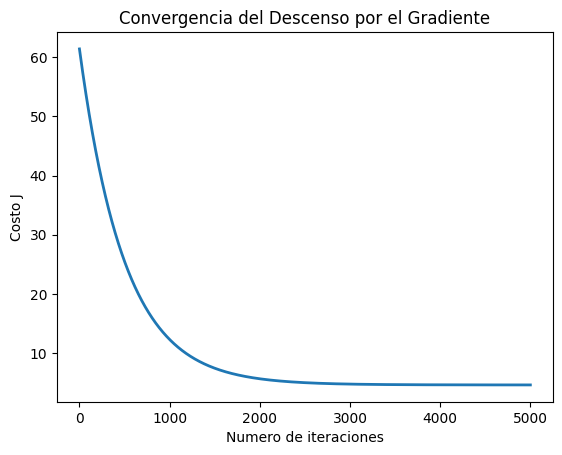

theta calculado por el descenso por el gradiente: [ 1.05929939e+01 -3.79286451e-02  4.93245768e-02  3.42334233e-02
  1.49858144e-02  3.06525381e-02 -2.02287822e-02  3.61025408e-03
  6.26081869e-02 -2.34358138e-02 -2.38440723e-02]
Prueba de prediccion: $11


In [109]:
alpha = 0.001
num_iters = 5000
theta = np.zeros(11)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
print(J_history[-1])
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')
pyplot.title('Convergencia del Descenso por el Gradiente')
pyplot.show()

print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))
X_array = [1,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252]
X_array[1:] = (X_array[1:] - mu) / sigma
Precio = np.dot(X_array, theta)

print('Prueba de prediccion: ${:.0f}'.format(Precio))

In [110]:
X_norm, mu, sigma = featureNormalize(X_prediccion)
X_regresion = np.concatenate([np.ones((m_prediccion, 1)), X_norm], axis=1)
for i in range(m_prediccion):
  X_array = np.array(X_regresion[i])
  Prediccion = np.dot(X_array, theta)
  print('prediccion: ',Prediccion, 'valor real: ',y_prediccion.iloc[i])

prediccion:  10.75014341076345 valor real:  9.1541
prediccion:  10.388480786005891 valor real:  11.3404
prediccion:  10.708755359951384 valor real:  11.8217
prediccion:  10.3998915421936 valor real:  13.7624
prediccion:  10.471185854588091 valor real:  11.8173
prediccion:  10.609097496936004 valor real:  12.7433
prediccion:  10.563415068354402 valor real:  8.538
prediccion:  10.595453745491868 valor real:  12.0735
prediccion:  10.647195632282875 valor real:  9.4599
prediccion:  10.658558862591796 valor real:  9.1432
prediccion:  10.488149508300207 valor real:  11.3361
prediccion:  10.676559158374326 valor real:  13.0651
prediccion:  10.50675114085018 valor real:  7.4796
prediccion:  10.675211170784094 valor real:  7.7141
prediccion:  10.642731132652356 valor real:  13.7193
prediccion:  10.710642583389902 valor real:  9.3473
prediccion:  10.588429468736058 valor real:  13.3736
prediccion:  10.548321262679412 valor real:  12.1919
prediccion:  10.423782146024285 valor real:  10.945
predic

ECUACION DE LA NORMAL

In [111]:
# Cargar datos
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/train.csv')
data = data.dropna()
data = data.iloc[:15100, :20]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
display(data)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,train_15095,0,8.5855,-7.8002,11.5127,4.5593,13.2591,-8.4809,4.8452,17.6241,2.1613,6.5509,5.1339,1.6837,14.2352,3.2109,4.6824,14.0312,4.0560,-1.5052
15096,train_15096,0,14.8375,-4.6441,7.1011,4.9215,12.7910,-7.4927,6.0465,9.8972,-4.6045,5.6907,0.3959,-12.4485,13.8699,15.5086,8.7173,14.9693,7.6929,-3.1711
15097,train_15097,0,9.5355,-6.1333,8.6909,4.7539,9.4431,-0.5359,5.4564,18.6016,0.0965,6.1862,-0.3226,0.9582,14.0583,6.0944,4.4322,14.6672,8.4355,-2.1609
15098,train_15098,0,10.6879,-6.2451,12.5220,10.4461,10.9004,-11.0051,4.5905,16.7736,3.0807,8.9828,1.4123,-4.9947,13.7543,5.2674,8.1354,14.3847,7.5089,-0.7479


In [113]:
X = data.iloc[:15000, 3:13]
y = data.iloc[:15000, 2]
m = y.size
X_prediccion = data.iloc[15000:15100, 3:13]
y_prediccion = data.iloc[15000:15100, 2]
m_prediccion = y_prediccion.size

In [114]:
print(X.head())

    var_1    var_2   var_3    var_4   var_5   var_6    var_7   var_8   var_9  \
0 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266 -4.9200  5.7470   
1 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338  3.1468  8.0851   
2 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155 -4.9193  5.9525   
3 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250 -5.8609  8.2450   
4 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514  6.2654  7.6784   

   var_10  
0  2.9252  
1 -0.4032  
2 -0.3249  
3  2.3061  
4 -9.4458  


In [115]:
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [116]:
# Funcion de la ecuacion de la normal, obtenemos valores optimos
def normalEqn(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [117]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y)

# Muestra los resultados obtenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)))
X_array = [1,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252]
Ycalculada = np.dot(X_array, theta)
print('Prueba de prediccion: ',Ycalculada)
j=computeCostMulti(X, y, theta)
print('Costo: ',j)

Theta calculado a partir de la ecuación de la normal: [ 1.04980248e+01 -9.40310888e-03  1.89280681e-02  1.68342991e-02
  9.27890848e-03  3.92418949e-03 -2.34681434e-02  1.07219730e-03
  1.91174765e-02 -1.89894697e-02 -4.37491727e-03]
Prueba de prediccion:  10.62674150209905
Costo:  4.627620692207196


In [118]:
X_regresion = np.concatenate([np.ones((m_prediccion, 1)), X_prediccion], axis=1)
for i in range(m_prediccion):
  X_array = np.array(X_regresion[i])
  Prediccion = np.dot(X_array, theta)
  print('prediccion: ',Prediccion, 'valor real: ',y_prediccion.iloc[i])

prediccion:  10.79496162686535 valor real:  9.1541
prediccion:  10.45044294182668 valor real:  11.3404
prediccion:  10.776666007023046 valor real:  11.8217
prediccion:  10.45706772320235 valor real:  13.7624
prediccion:  10.52288592513011 valor real:  11.8173
prediccion:  10.649937134304016 valor real:  12.7433
prediccion:  10.63061746358088 valor real:  8.538
prediccion:  10.65984160129559 valor real:  12.0735
prediccion:  10.711368354753041 valor real:  9.4599
prediccion:  10.727189409294581 valor real:  9.1432
prediccion:  10.551472616009363 valor real:  11.3361
prediccion:  10.72679555395504 valor real:  13.0651
prediccion:  10.57488386963797 valor real:  7.4796
prediccion:  10.721647874196174 valor real:  7.7141
prediccion:  10.706549164921118 valor real:  13.7193
prediccion:  10.771515610630743 valor real:  9.3473
prediccion:  10.640150341590253 valor real:  13.3736
prediccion:  10.593445172350858 valor real:  12.1919
prediccion:  10.472070189966063 valor real:  10.945
prediccion

REGRESION POLINOMIAL

In [119]:
# Cargar datos
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/train.csv')
data = data.dropna()
data = data.iloc[:15100, :20]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100 entries, 0 to 15099
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID_code  15100 non-null  object 
 1   target   15100 non-null  int64  
 2   var_0    15100 non-null  float64
 3   var_1    15100 non-null  float64
 4   var_2    15100 non-null  float64
 5   var_3    15100 non-null  float64
 6   var_4    15100 non-null  float64
 7   var_5    15100 non-null  float64
 8   var_6    15100 non-null  float64
 9   var_7    15100 non-null  float64
 10  var_8    15100 non-null  float64
 11  var_9    15100 non-null  float64
 12  var_10   15100 non-null  float64
 13  var_11   15100 non-null  float64
 14  var_12   15100 non-null  float64
 15  var_13   15100 non-null  float64
 16  var_14   15100 non-null  float64
 17  var_15   15100 non-null  float64
 18  var_16   15100 non-null  float64
 19  var_17   15100 non-null  float64
dtypes: float64(18), int64(1), object(1)
memory usage: 

In [121]:
X = data.iloc[:15000, 3:13]
y = data.iloc[:15000, 2]
m = y.size
X_prediccion = data.iloc[15000:15100, 3:13]
y_prediccion = data.iloc[15000:15100, 2]
m_prediccion = y_prediccion.size

In [122]:
print(X)
print(y)
print(m)

        var_1    var_2   var_3    var_4    var_5   var_6    var_7   var_8  \
0     -6.7863  11.9081  5.0930  11.4607  -9.2834  5.1187  18.6266 -4.9200   
1     -4.1473  13.8588  5.3890  12.3622   7.0433  5.6208  16.5338  3.1468   
2     -2.7457  12.0805  7.8928  10.5825  -9.0837  6.9427  14.6155 -4.9193   
3     -2.1518   8.9522  7.1957  12.5846  -1.8361  5.8428  14.9250 -5.8609   
4     -1.4834  12.8746  6.6375  12.2772   2.4486  5.9405  19.2514  6.2654   
...       ...      ...     ...      ...      ...     ...      ...     ...   
14995 -1.4902   7.5862  3.9244  10.2094 -12.8634  4.5596  17.9995 -2.4126   
14996 -3.5711   9.1183  4.0982  11.5491  -2.2578  4.7041  15.5434  2.4019   
14997 -6.6641   8.5778  9.0083  11.9405  -8.2972  5.9313  21.6239 -3.1297   
14998  3.2357   9.0373  4.0439   9.7292  -7.1489  5.9483  11.2672 -2.7772   
14999 -5.1629   8.0774  9.9412   9.0771  -6.1688  6.7533  23.9643 -0.0669   

        var_9  var_10  
0      5.7470  2.9252  
1      8.0851 -0.4032  
2  

In [123]:
X = np.concatenate([X, X * X], axis=1)
print(X[1])

[-4.14730000e+00  1.38588000e+01  5.38900000e+00  1.23622000e+01
  7.04330000e+00  5.62080000e+00  1.65338000e+01  3.14680000e+00
  8.08510000e+00 -4.03200000e-01  1.72000973e+01  1.92066337e+02
  2.90413210e+01  1.52823989e+02  4.96080749e+01  3.15933926e+01
  2.73366542e+02  9.90235024e+00  6.53688420e+01  1.62570240e-01]


In [124]:
print(X)

[[-6.78630000e+00  1.19081000e+01  5.09300000e+00 ...  2.42064000e+01
   3.30280090e+01  8.55679504e+00]
 [-4.14730000e+00  1.38588000e+01  5.38900000e+00 ...  9.90235024e+00
   6.53688420e+01  1.62570240e-01]
 [-2.74570000e+00  1.20805000e+01  7.89280000e+00 ...  2.41995125e+01
   3.54322562e+01  1.05560010e-01]
 ...
 [-6.66410000e+00  8.57780000e+00  9.00830000e+00 ...  9.79502209e+00
   4.61353393e+01  1.40209281e+00]
 [ 3.23570000e+00  9.03730000e+00  4.04390000e+00 ...  7.71283984e+00
   5.05321940e+01  9.14518081e+00]
 [-5.16290000e+00  8.07740000e+00  9.94120000e+00 ...  4.47561000e-03
   8.11764960e+01  2.42733582e+01]]


In [125]:
num_filas, num_columnas = X.shape
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 15000
Número de columnas: 20


In [126]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [127]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[-6.78630000e+00  1.19081000e+01  5.09300000e+00 ...  2.42064000e+01
   3.30280090e+01  8.55679504e+00]
 [-4.14730000e+00  1.38588000e+01  5.38900000e+00 ...  9.90235024e+00
   6.53688420e+01  1.62570240e-01]
 [-2.74570000e+00  1.20805000e+01  7.89280000e+00 ...  2.41995125e+01
   3.54322562e+01  1.05560010e-01]
 ...
 [-6.66410000e+00  8.57780000e+00  9.00830000e+00 ...  9.79502209e+00
   4.61353393e+01  1.40209281e+00]
 [ 3.23570000e+00  9.03730000e+00  4.04390000e+00 ...  7.71283984e+00
   5.05321940e+01  9.14518081e+00]
 [-5.16290000e+00  8.07740000e+00  9.94120000e+00 ...  4.47561000e-03
   8.11764960e+01  2.42733582e+01]]
Media calculada: [ -1.65003286  10.69351039   6.79478264  11.08608493  -5.11033864
   5.40210415  16.59668167   0.30451747   7.56683945   0.37085813
  19.25220217 121.23876905  50.36070078 125.54375068  87.98487098
  29.93708165 287.13786394  10.9590579   58.80517803  30.17515968]
Desviación estandar calculada: [  4.06566031   2.62442461   2.04734698   1.6255680

In [128]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print (X[1])

[ 1.         -0.61423409  1.20608898 -0.68663624  0.78502715  1.54514302
  0.25179865 -0.01839304  0.86223542  0.41652974 -0.1412345  -0.08922743
  1.20588045 -0.75522503  0.75585908 -0.35716448  0.17378981 -0.11941733
 -0.08822618  0.35187726 -0.80706752]


In [129]:
print(X)

[[ 1.         -1.26332914  0.46280225 ...  1.10604139 -1.38191102
  -0.58133871]
 [ 1.         -0.61423409  1.20608898 ... -0.08822618  0.35187726
  -0.80706752]
 [ 1.         -0.26949304  0.52849284 ...  1.10546634 -1.2530196
  -0.80860058]
 ...
 [ 1.         -1.23327252 -0.80616162 ... -0.09718718 -0.67922857
  -0.77373556]
 [ 1.          1.2017071  -0.63107562 ... -0.27103184 -0.44351371
  -0.56551645]
 [ 1.         -0.86403361 -0.99683199 ... -0.91461527  1.19932374
  -0.15870514]]


In [130]:
def computeCostMulti(X, y, theta):
    m = y.shape[0]

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [131]:
def gradientDescentPoly(X, y, theta, alpha, num_iters):

    m = y.shape[0]

    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

In [132]:
num_filas, num_columnas = X.shape
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 15000
Número de columnas: 21


4.6260984265711755
theta calculado por el descenso por el gradiente:  [ 1.06641906e+01 -5.12444079e-02  4.26807061e-04  5.03598565e-02
  3.43978691e-03  1.57101247e-02 -1.08643834e-02  1.12839679e-02
  6.06397585e-02 -1.10660878e-02 -2.64686389e-02 -2.45234957e-02
  5.22310458e-02 -1.99872666e-02  1.24409883e-02 -1.97762993e-02
 -9.64370178e-03 -9.03130281e-03  2.01069967e-02 -1.28741278e-02
  3.42666553e-02]
Y Predicha:  10.62624861459412


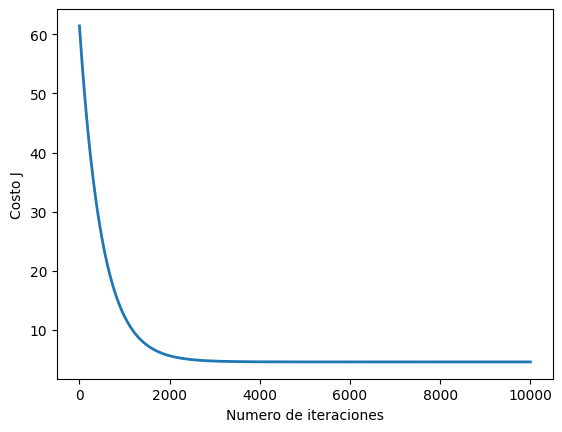

In [133]:
alpha = 0.001
num_iters = 10000

theta = np.zeros(21)
theta, J_history = gradientDescentPoly(X, y, theta, alpha, num_iters)
print(J_history[-1])
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('theta calculado por el descenso por el gradiente: ',str(theta))

X_array = [1,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,
           -6.7863*-6.7863,11.9081*11.9081,5.0930*5.0930,11.4607*11.4607,-9.2834*-9.2834,5.1187*5.1187
           ,18.6266*18.6266,-4.9200*-4.9200,5.7470*5.7470,2.9252*2.9252]
X_array[1:] = (X_array[1:] - mu) / sigma
Ycalculada = np.dot(X_array, theta)

print('Y Predicha: ',Ycalculada)

In [134]:
X_prediccion= np.concatenate([X_prediccion, X_prediccion * X_prediccion], axis=1)
X_norm, mu, sigma = featureNormalize(X_prediccion)
X_regresion = np.concatenate([np.ones((m_prediccion, 1)), X_norm], axis=1)
for i in range(m_prediccion):
  X_array = np.array(X_regresion[i])
  Prediccion = np.dot(X_array, theta)
  print('prediccion: ',Prediccion, 'valor real: ',y_prediccion.iloc[i])

prediccion:  10.794329398638775 valor real:  9.1541
prediccion:  10.410610034164323 valor real:  11.3404
prediccion:  10.735902995405663 valor real:  11.8217
prediccion:  10.524988938500181 valor real:  13.7624
prediccion:  10.537581370587153 valor real:  11.8173
prediccion:  10.719729378043683 valor real:  12.7433
prediccion:  10.609936155716017 valor real:  8.538
prediccion:  10.698351020797343 valor real:  12.0735
prediccion:  10.815068327735336 valor real:  9.4599
prediccion:  10.725322445776454 valor real:  9.1432
prediccion:  10.47507194908011 valor real:  11.3361
prediccion:  10.853672999639075 valor real:  13.0651
prediccion:  10.529401423486705 valor real:  7.4796
prediccion:  10.715397814206797 valor real:  7.7141
prediccion:  10.70260790779742 valor real:  13.7193
prediccion:  10.865044992899943 valor real:  9.3473
prediccion:  10.65472372469556 valor real:  13.3736
prediccion:  10.696653075416123 valor real:  12.1919
prediccion:  10.590355322154306 valor real:  10.945
predi